# **Aproximación a la Calidad de Datos**
Realizado por David Venegas  
1er Cuatrimestre a distancia 2020  
EXACTAS, UBA  

Primero necesitaremos la siguiente biblioteca

In [1]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 416 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Análisis Preliminar
Imprimimos los primeros valores del dataset.

In [3]:
df_presupuesto = pd.read_csv("../input/presupuesto-ejecutado-caba-2018-3er-trimestre/presupuesto-ejecutado-2018-tercer-trimestre.csv")
print('El dataset tiene ' + str(df_presupuesto.shape[0]) + ' filas, y ' + str(df_presupuesto.shape[1]) + ' columnas')
df_presupuesto.head()

El dataset tiene 52053 filas, y 44 columnas


,car,car_desc,jur,jur_desc,sjur,sjur_desc,ent,ent_desc,og,eg_desc,...,eco,eco_desc,fte,fte_desc,geo,geo_desc,sancion,vigente,definitivo,devengado
0,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,...,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,958764741,1077764741,6.554030e+08,6.554030e+08
1,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,...,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,79897062,79897062,3.970436e+07,3.970436e+07
2,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,...,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,208100268,208100268,1.466619e+08,1.466619e+08
3,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,...,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,830336506,830336506,5.952491e+08,5.952491e+08
4,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,...,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,69194709,69194709,3.481410e+07,3.481410e+07


# Consistencia
Revisamos para cada variable que datos faltan o mejor dicho cuantos datos NULL existen. En la próxima tabla podemos apreciar que no faltan datos.

In [4]:
df_presupuesto.isnull().sum() == 0

car           True
car_desc      True
jur           True
jur_desc      True
sjur          True
sjur_desc     True
ent           True
ent_desc      True
og            True
eg_desc       True
ue            True
ue_desc       True
prog          True
prog_desc     True
sprog         True
sprog_desc    True
proy          True
proy_desc     True
actividad     True
act_desc      True
ob            True
ob_desc       True
fin           True
fin_desc      True
fun           True
fun_desc      True
inc           True
inc_desc      True
ppal          True
ppal_desc     True
par           True
par_desc      True
spar          True
spar_desc     True
eco           True
eco_desc      True
fte           True
fte_desc      True
geo           True
geo_desc      True
sancion       True
vigente       True
definitivo    True
devengado     True
dtype: bool

## Descripción Numérica
Ahora calculamos la media de cada variable numérica, su desviación estandar, mediana, mínimo y máximo. 

In [5]:
#Revisamos los tipos de cada columna
df_presupuesto.dtypes

car             int64
car_desc       object
jur             int64
jur_desc       object
sjur            int64
sjur_desc      object
ent             int64
ent_desc       object
og              int64
eg_desc        object
ue              int64
ue_desc        object
prog            int64
prog_desc      object
sprog           int64
sprog_desc     object
proy            int64
proy_desc      object
actividad       int64
act_desc       object
ob              int64
ob_desc        object
fin             int64
fin_desc       object
fun             int64
fun_desc       object
inc             int64
inc_desc       object
ppal            int64
ppal_desc      object
par             int64
par_desc       object
spar            int64
spar_desc      object
eco             int64
eco_desc       object
fte             int64
fte_desc       object
geo             int64
geo_desc       object
sancion         int64
vigente         int64
definitivo    float64
devengado     float64
dtype: object

In [6]:
#Convertimos las variebles numéricas que son códigos a categóricas
df_presupuesto['car'] = df_presupuesto.car.astype('category')
df_presupuesto['jur'] = df_presupuesto.jur.astype('category')
df_presupuesto['sjur'] = df_presupuesto.sjur.astype('category')
df_presupuesto['og'] = df_presupuesto.og.astype('category')
df_presupuesto['ue'] = df_presupuesto.ue.astype('category')
df_presupuesto['prog'] = df_presupuesto.prog.astype('category')
df_presupuesto['sprog'] = df_presupuesto.sprog.astype('category')
df_presupuesto['proy'] = df_presupuesto.proy.astype('category')
df_presupuesto['actividad'] = df_presupuesto.actividad.astype('category')
df_presupuesto['ob'] = df_presupuesto.ob.astype('category')
df_presupuesto['fin'] = df_presupuesto.fin.astype('category')
df_presupuesto['fun'] = df_presupuesto.fun.astype('category')
df_presupuesto['inc'] = df_presupuesto.inc.astype('category')
df_presupuesto['ppal'] = df_presupuesto.ppal.astype('category')
df_presupuesto['par'] = df_presupuesto.par.astype('category')
df_presupuesto['spar'] = df_presupuesto.spar.astype('category')
df_presupuesto['eco'] = df_presupuesto.eco.astype('category')
df_presupuesto['fte'] = df_presupuesto.fte.astype('category')
df_presupuesto['geo'] = df_presupuesto.geo.astype('category')
df_presupuesto['fin'] = df_presupuesto.fin.astype('category')
df_presupuesto['ent'] = df_presupuesto.ent.astype('category')

In [7]:
df_presupuesto.describe()

,sancion,vigente,definitivo,devengado
count,5.205300e+04,5.205300e+04,5.205300e+04,5.205300e+04
mean,4.280371e+06,4.831267e+06,3.399354e+06,3.133693e+06
std,4.165309e+07,8.166233e+07,6.868158e+07,6.829328e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00
50%,2.700000e+04,7.209100e+04,1.870000e+04,1.455198e+04
75%,4.622310e+05,7.807920e+05,3.979640e+05,3.417903e+05
max,4.008702e+09,1.217582e+10,1.217582e+10,1.217582e+10


## Análisis Descriptivo

Calculamos la cantidad de valores únicos por variable categórica

In [8]:
df_unique = df_presupuesto.select_dtypes(['object']).nunique().to_frame().reset_index()
df_unique.columns = ['Variable','Cantidad de Valores Unicos']

In [9]:
df_unique

,Variable,Cantidad de Valores Unicos
0,car_desc,2
1,jur_desc,22
2,sjur_desc,29
3,ent_desc,59
4,eg_desc,59
5,ue_desc,345
6,prog_desc,513
7,sprog_desc,556
8,proy_desc,808
9,act_desc,1677


Vemos algunos datos relevantes de todas las variables 

In [10]:
df_presupuesto.describe(include=object)

,car_desc,jur_desc,sjur_desc,ent_desc,eg_desc,ue_desc,prog_desc,sprog_desc,proy_desc,act_desc,ob_desc,fin_desc,fun_desc,inc_desc,ppal_desc,par_desc,spar_desc,eco_desc,fte_desc,geo_desc
count,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053,52053
unique,2,22,29,59,59,345,513,556,808,1677,2191,5,20,8,49,173,367,23,7,16
top,Administracion Central,Ministerio De Educación E Innovación,Ministerio De Educación E Innovación,Ministerio De Educación E Innovación,Ministerio De Educación E Innovación,Dir. Gral De Educacion De Gestion Estatal,Atención Médica General En Hospitales De Agudos,Educacion Primaria,Educacion Primaria,Administración Y Servicios Generales,Administración Y Servicios Generales,Servicios Sociales,Dirección Ejecutiva,Gastos En Personal,Personal Permanente,Otros No Especificados Precedentemente,Otros No Especificados Precedentemente,Remuneraciones Al Personal,Tesoro De La Ciudad,Comuna 1
freq,43287,8078,8078,8078,8078,3943,2042,1285,1285,5552,5552,25106,8045,17258,7026,5287,5287,17258,45841,19622


## CARACTER
Graficamos la frecuencia de la variable usando pyWaffle

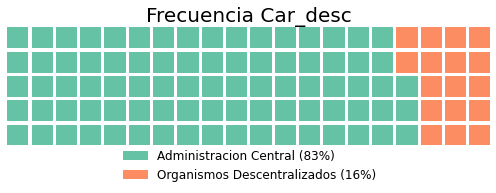

In [11]:
df = df_presupuesto
calculated = df.car_desc.value_counts()
data = calculated.to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    figsize = [7,5],
    rows=5,
    columns=20,
    values=data,
    plot_anchor='N',
    tight_layout= False,
    title={
        'label': 'Frecuencia Car_desc',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
        legend={
        'loc': 'lower right',
        'bbox_to_anchor': (0.787, -0.4),
        'framealpha': 0,
        'fontsize': 12
    }

)
fig.savefig('car.jpeg', bbox_inches='tight', pad_inches=0)

## Jurisdicción, Subjicción, Finalidad, Función, Inciso, Ubicación geográfica.
Graficamos la frecuencia de las variables usando seaborn.



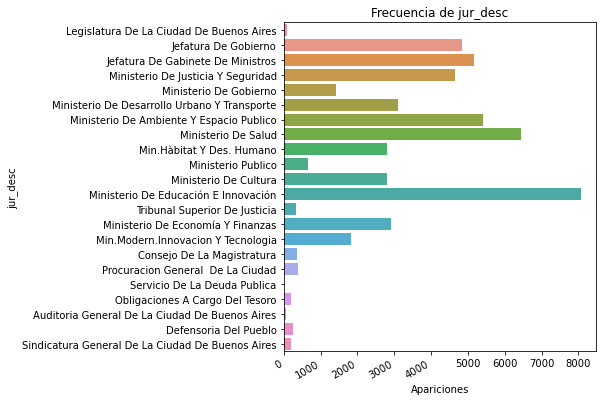

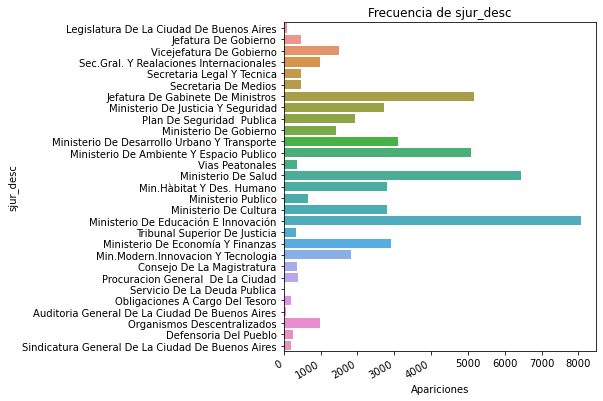

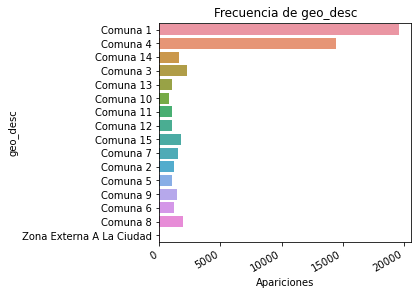

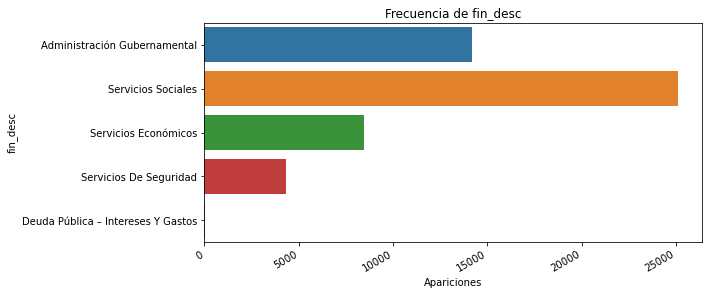

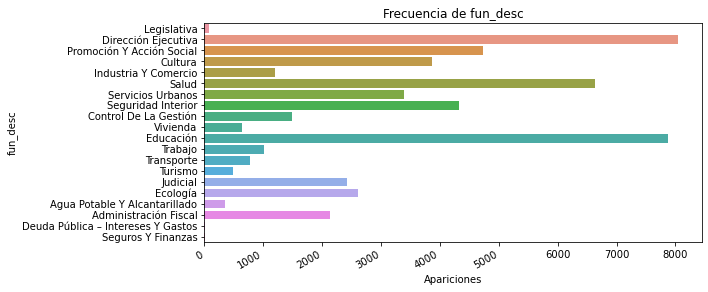

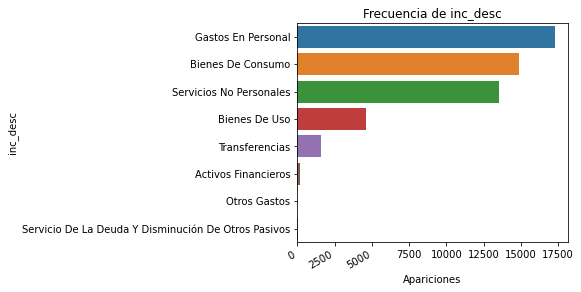

In [12]:
#var_categoricas = list(df_presupuesto.select_dtypes(object))
var_categoricas = ['jur_desc','sjur_desc', 'geo_desc',"fin_desc","fun_desc", "inc_desc"]
for variable in var_categoricas:
    sns.countplot(y=variable, data=df_presupuesto)
    plt.title(F'Frecuencia de {variable}')
    plt.xlabel('Apariciones')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.setp(plt.xticks()[1], rotation=30, ha='right')
    if (variable in ['jur_desc','sjur_desc'] ):
        plt.gcf().set_size_inches(14,6 )
    elif (variable in ['fin_desc', "fun_desc","inc_desc"] ):
        plt.gcf().set_size_inches(14,4 )
    plt.tick_params(axis='y', labelsize=10)
    plt.savefig(f"{variable}.jpeg", bbox_inches='tight')
    plt.show()

Vemos además la proporción de la frecuencia de cada variable.

In [13]:
df_presupuesto['jur_desc'].value_counts(normalize=True)

Ministerio De Educación E Innovación                0.155188
Ministerio De Salud                                 0.123855
Ministerio De Ambiente Y Espacio Publico            0.104201
Jefatura De Gabinete De Ministros                   0.099322
Jefatura De Gobierno                                0.093232
Ministerio De Justicia Y Seguridad                  0.089582
Ministerio De Desarrollo Urbano Y Transporte        0.059824
Ministerio De Economía Y Finanzas                   0.055981
Ministerio De Cultura                               0.054060
Min.Hàbitat Y Des. Humano                           0.053734
Min.Modern.Innovacion Y Tecnologia                  0.035099
Ministerio De Gobierno                              0.027299
Ministerio Publico                                  0.012910
Procuracion General  De La Ciudad                   0.007627
Consejo De La Magistratura                          0.006820
Tribunal Superior De Justicia                       0.006320
Defensoria Del Pueblo   

In [14]:
df_presupuesto['sjur_desc'].value_counts(normalize=True)

Ministerio De Educación E Innovación                0.155188
Ministerio De Salud                                 0.123855
Jefatura De Gabinete De Ministros                   0.099322
Ministerio De Ambiente Y Espacio Publico            0.097535
Ministerio De Desarrollo Urbano Y Transporte        0.059824
Ministerio De Economía Y Finanzas                   0.055981
Ministerio De Cultura                               0.054060
Min.Hàbitat Y Des. Humano                           0.053734
Ministerio De Justicia Y Seguridad                  0.052485
Plan De Seguridad  Publica                          0.037097
Min.Modern.Innovacion Y Tecnologia                  0.035099
Vicejefatura De Gobierno                            0.028836
Ministerio De Gobierno                              0.027299
Sec.Gral. Y Realaciones Internacionales             0.018769
Organismos Descentralizados                         0.018692
Ministerio Publico                                  0.012910
Secretaria Legal Y Tecni

In [15]:
df_presupuesto['ent_desc'].value_counts().head(10)

Ministerio De Educación E Innovación            8078
Ministerio De Salud                             6447
Ministerio De Ambiente Y Espacio Publico        3478
Ministerio De Desarrollo Urbano Y Transporte    3114
Min.Hàbitat Y Des. Humano                       2797
Ministerio De Cultura                           2515
Jefatura De Gabinete De Ministros               2244
Ministerio De Justicia Y Seguridad              1907
Ministerio De Economía Y Finanzas               1858
Plan De Seguridad  Publica                      1843
Name: ent_desc, dtype: int64

Algunas varibles tienen demasiados posibles valores para graficarlas así que vamos a listar sus valores principales para hacer tablas:
## Oficina de Gestión

In [16]:
df_presupuesto['eg_desc'].value_counts(normalize=True).head(10)

Ministerio De Educación E Innovación            0.155188
Ministerio De Salud                             0.123855
Ministerio De Ambiente Y Espacio Publico        0.066817
Ministerio De Desarrollo Urbano Y Transporte    0.059824
Min.Hàbitat Y Des. Humano                       0.053734
Ministerio De Cultura                           0.048316
Jefatura De Gabinete De Ministros               0.043110
Ministerio De Justicia Y Seguridad              0.036636
Ministerio De Economía Y Finanzas               0.035694
Plan De Seguridad  Publica                      0.035406
Name: eg_desc, dtype: float64

In [17]:
# Es raro que spar se parezca tanto a par así que revisamos si hay diferencias 
df_presupuesto['eg_desc'].equals(df_presupuesto['ent_desc'])
#Y comprobamos que no son iguales siempre, solo en sus principales items

False

In [18]:
df = df_presupuesto
df1 = df_presupuesto['eg_desc']
df2 = df_presupuesto['ent_desc']
df["Eq"] = df1.where(df1.values!=df2.values).notna()
new = df.loc[df['eg_desc'] != df['ent_desc']]
new[['eg_desc','ent_desc']].to_csv("comparacion-eg-vs-ent.csv")

## Unidad ejecutora

In [19]:
df_presupuesto['ue_desc'].value_counts().head(10)

Dir. Gral De Educacion De Gestion Estatal                       3943
Agencia Ambiental                                                777
Ss. Carrera Docente Y Formacion Tecnico Profesional              670
Subsecretaria De Coordinacion Pedagogica Y Equidad Educativa     621
Administ.Gubernamental De Ingresos Publicos                      616
Consejo De Los Derechos De Las Niñas, Niños Y  Adolescentes      591
Dir.Gral. Fiscalizaciòn Del Espacio Publico                      551
Dir.Gral.Patrimonio Museos Y Casco Historico                     542
Dirección General De Educación Superior                          528
Direccion General De Espacios Verdes                             518
Name: ue_desc, dtype: int64

## Programa

In [20]:
df_presupuesto['prog_desc'].value_counts(normalize=True).head(10)

Atención Médica General En Hospitales De Agudos    0.039229
Educacion Primaria                                 0.024686
Educacion Inicial                                  0.017040
Atención De Salud Mental                           0.014351
Educacion Del Adulto Y Del Adolescente             0.011431
Atención Médica De Patologías Específicas          0.010009
Cuidado Y Puesta En Valor De Espacios Verdes       0.009951
Administracion De Infracciones En La Ciudad        0.009221
Policía De La Ciudad                               0.008741
Atención Médica Materno Infantil                   0.008626
Name: prog_desc, dtype: float64

## Subprograma

In [21]:
df_presupuesto['sprog_desc'].value_counts(normalize=True).head(10)

Educacion Primaria                              0.024686
Educacion Inicial                               0.017040
Educacion Del Adulto Y Del Adolescente          0.011431
Cuidado Y Puesta En Valor De Espacios Verdes    0.009951
Administracion De Infracciones En La Ciudad     0.009221
Policía De La Ciudad                            0.008741
Educacion Media                                 0.008607
Sistema Estadístico De La Ciudad.               0.008395
Actividades Centrales                           0.008318
Sanidad Y Tenencia Responsable De Mascotas      0.008049
Name: sprog_desc, dtype: float64

## Proyecto

In [22]:
df_presupuesto['proy_desc'].value_counts(normalize=True).head(10)

Educacion Primaria                              0.024686
Educacion Inicial                               0.017040
Educacion Del Adulto Y Del Adolescente          0.011431
Administracion De Infracciones En La Ciudad     0.009221
Educacion Media                                 0.008607
Sistema Estadístico De La Ciudad.               0.008357
Actividades Centrales                           0.008126
Sanidad Y Tenencia Responsable De Mascotas      0.008049
Policía De La Ciudad                            0.007473
Cuidado Y Puesta En Valor De Espacios Verdes    0.007147
Name: proy_desc, dtype: float64

## Actividad

In [23]:
df_presupuesto['act_desc'].value_counts().head(10)

Administración Y Servicios Generales          5552
Conducción                                    5338
Conduccion                                    4816
Administracion Y Servicios Generales          3297
Conducción Y Administración                   1518
Servicios De Diagnóstico Y Tratamiento        1030
Servicios Generales De Mantenimiento           557
Atención Ambulatoria - Consultorio Externo     472
Servicios De Internación                       401
Mantenimiento Comunal                          400
Name: act_desc, dtype: int64

## Obra

In [24]:
df_presupuesto['ob_desc'].value_counts().head(10)

Administración Y Servicios Generales          5552
Conducción                                    5338
Conduccion                                    4816
Administracion Y Servicios Generales          3297
Conducción Y Administración                   1518
Servicios De Diagnóstico Y Tratamiento        1030
Servicios Generales De Mantenimiento           557
Atención Ambulatoria - Consultorio Externo     472
Servicios De Internación                       401
Mantenimiento Comunal                          400
Name: ob_desc, dtype: int64

In [25]:
# Es raro que spar se parezca tanto a par así que revisamos si hay diferencias 
df['ob_desc'].equals(df['act_desc'])
#Y comprobamos que no son iguales siempre, solo en sus principales items
df = df_presupuesto
df1 = df_presupuesto['ob_desc']
df2 = df_presupuesto['act_desc']
df["Eq"] = df1.where(df1.values!=df2.values).notna()
new = df.loc[df['ob_desc'] != df['act_desc']]
new[['ob_desc','act_desc']]
new[['ob_desc','act_desc']].to_csv("comparacion.csv")

## Finalidad

In [26]:
df_presupuesto['fin'].value_counts()

3    25106
1    14162
4     8454
2     4316
5       15
Name: fin, dtype: int64

## Función

In [27]:
df_presupuesto['fun'].value_counts()

2    11460
4    10482
3     8825
1     6729
5     4352
6     4335
9     3389
7     2121
8      360
Name: fun, dtype: int64

## Partida principal

In [28]:
df_presupuesto['ppal_desc'].value_counts(normalize=True).head(10)

Personal Permanente                                    0.134978
Otros Bienes De Consumo                                0.093482
Personal Transitorio                                   0.088986
Servicios Especializados, Comerciales Y Financieros    0.065049
Productos Químicos, Combustibles Y Lubricantes         0.058133
Mantenimiento, Reparación Y Limpieza                   0.057403
Maquinaria Y Equipo                                    0.057038
Pulpa,Papel, Cartón Y Sus Productos                    0.053638
Otros Servicios                                        0.037923
Asignaciones Familiares                                0.037001
Name: ppal_desc, dtype: float64

## Partida parcial

In [29]:
df_presupuesto['par_desc'].value_counts().head(10)

Otros No Especificados Precedentemente       5287
Contribuciones Patronales                    3333
Retribución Del Cargo                        3328
Sueldo Anual Complementario                  3238
Complementos                                 3143
Seguros De Riesgo De Trabajo                 1656
Personal Permanente                          1164
Alimentos Para Personas                      1039
Útiles De Escritorio, Oficina Y Enseñanza    1008
Productos Farmacéuticos Y Medicinales         958
Name: par_desc, dtype: int64

## Subpartida

In [30]:
df_presupuesto['spar_desc'].value_counts(normalize=True).head(10)

Otros No Especificados Precedentemente       0.101570
Contribuciones Patronales                    0.064031
Retribución Del Cargo                        0.063935
Sueldo Anual Complementario                  0.062206
Complementos                                 0.060381
Seguros De Riesgo De Trabajo                 0.031814
Personal Permanente                          0.022362
Alimentos Para Personas                      0.019960
Útiles De Escritorio, Oficina Y Enseñanza    0.019365
Productos Farmacéuticos Y Medicinales        0.018404
Name: spar_desc, dtype: float64

In [31]:
# Es raro que spar se parezca tanto a par así que revisamos si hay diferencias 
df['par_desc'].equals(df['spar_desc'])
#Y comprobamos que no son iguales siempre, solo en sus principales items
df = df_presupuesto
df1 = df_presupuesto['par_desc']
df2 = df_presupuesto['spar_desc']
df["Eq"] = df1.where(df1.values!=df2.values).notna()
new = df.loc[df['par_desc'] != df['spar_desc']]
new[['par_desc','spar_desc']]
new[['par_desc','spar_desc']].to_csv("comparacion par vs spar.csv")

## Clasificador económico

In [32]:
df_presupuesto['eco_desc'].value_counts()

Remuneraciones Al Personal               17258
Bienes De Consumo                        14895
Servicios No Personales                  13499
Maquinaria Y Equipo                       2973
Al Sector Privado                         1484
Construcciones Del Dominio Privado         688
Construcciones Del Dominio Público         557
Activos Financieros                        179
Bienes De Uso                              178
Activos Intangibles                        174
Al Sector Público                           70
Transferencias                              32
Impuestos Directos                          16
Concesión De Préstamo De Largo Plazo        14
Al Sector Externo                           13
Intereses                                   10
Arrendamiento De Tierras Y Terrenos          3
Adelanto A Proveedores Y Contratistas        3
Impuestos Indirectos                         2
Edificios E Instalaciones                    2
Derechos Sobre Bienes Intangibles            1
Concesión De 

In [33]:
df = df_presupuesto
calculated = df.eco_desc.value_counts()
data = calculated.to_list()
otros = sum(filter(lambda x: (x/52053)*100<=1, data))
data = filter(lambda x: (x/52053)*100>3, data) 
data = [x/52053*100 for x in data] + [otros/52053*100]
data

[33.154669279388315,
 28.615065414097167,
 25.933183486062283,
 5.711486369661691,
 1.3428620828770677]

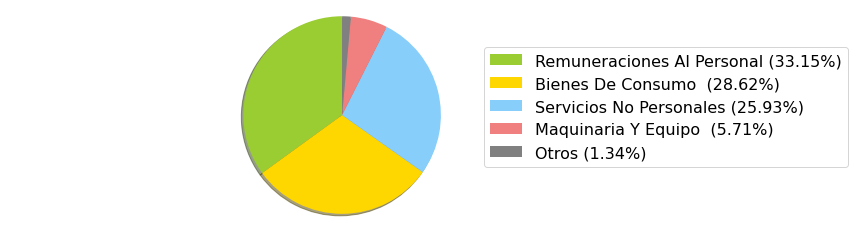

In [34]:
labels = ['Remuneraciones Al Personal', 'Bienes De Consumo ', 'Servicios No Personales', 'Maquinaria Y Equipo ', 'Otros']
sizes = data
labels = [f"{k} ({round(v,2)}%)" for k, v in zip(labels, data)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,  bbox_to_anchor=(0.7, 0.85), prop={'size': 16})
plt.axis('equal')
plt.gcf().set_size_inches(12,4 )
plt.savefig("eco_desc.jpeg", bbox_inches='tight')
plt.show()

## Fuente de financiamiento

In [35]:
df_presupuesto['fte_desc'].value_counts().head(10)

Tesoro De La Ciudad                   45841
Recursos Propios                       2297
Transferencias Afectadas               2146
Recursos Con Afectacion Especifica     1180
Transferencias Internas                 548
Financiamiento Externo                   38
Financiamiento Interno                    3
Name: fte_desc, dtype: int64

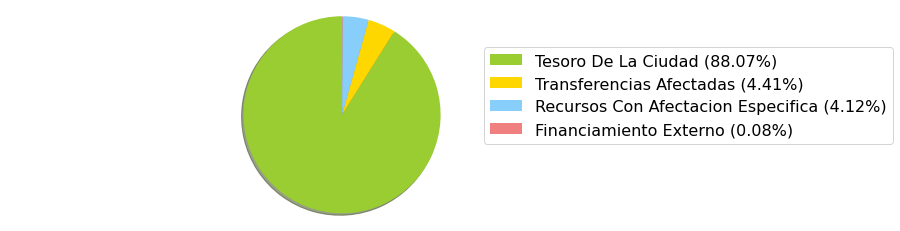

In [36]:
df = df_presupuesto
calculated = df.fte_desc.value_counts()
data = calculated.to_list()
otros = sum(filter(lambda x: (x/52053)*100<=1, data))
data = filter(lambda x: (x/52053)*100>3, data) 
data = [x/52053*100 for x in data] + [otros/52053*100]
labels = df.fte_desc.unique()
sizes = data
labels = [f"{k} ({round(v,2)}%)" for k, v in zip(labels, data)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'grey']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,  bbox_to_anchor=(0.7, 0.85), prop={'size': 16})
plt.axis('equal')
plt.gcf().set_size_inches(12,4 )
plt.savefig("fte_desc.jpeg", bbox_inches='tight')
plt.show()

## Sanción

In [37]:
df_S = df_presupuesto.loc[(df_presupuesto["sancion"] > 10000000) & (df_presupuesto["sancion"] != 0)]
df_s = df_presupuesto.loc[(df_presupuesto["sancion"] <= 10000000) & (df_presupuesto["sancion"] != 0)]
df_presupuesto[df_presupuesto.sancion == 0].count()["sancion"] 

16042

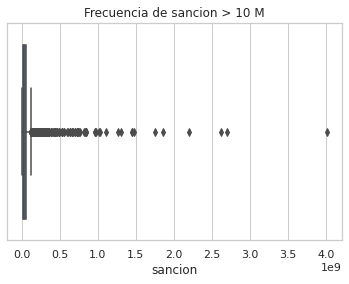

In [38]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_S["sancion"])
ax.set_title('Frecuencia de sancion > 10 M')
fig = ax.get_figure()
fig.savefig('S.png')

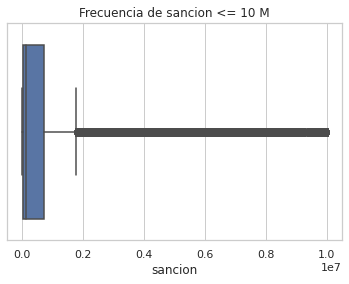

In [39]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_s["sancion"])
ax.set_title('Frecuencia de sancion <= 10 M')
fig = ax.get_figure()
fig.savefig('s.png')

In [40]:
print(df_s["sancion"].mean(),"\n", df_s["sancion"].median(), "\n", df_s["sancion"].std())
print("\n\n\n")
print(df_S["sancion"].mean(),"\n", df_S["sancion"].median(), "\n", df_S["sancion"].std())


837750.7935153069 
 111485.0 
 1690943.963655971




68288004.32422969 
 27635764.0 
 165105224.26716858


## Vigente

In [41]:
df_V = df_presupuesto.loc[(df_presupuesto["vigente"] > 10000000) & (df_presupuesto["vigente"] != 0)]
df_v = df_presupuesto.loc[(df_presupuesto["vigente"] <= 10000000) & (df_presupuesto["vigente"] != 0)]
print(df_presupuesto[df_presupuesto.vigente == 0].count()["vigente"])

print(df_v["vigente"].mean(),"\n", df_v["vigente"].median(), "\n", df_v["vigente"].std())
print("\n\n\n")
print(df_V["vigente"].mean(),"\n", df_V["vigente"].median(), "\n", df_V["vigente"].std())


5585
789175.2974419302 
 89720.0 
 1644460.1858367086




69749225.36243981 
 24007975.0 
 327029752.8676659


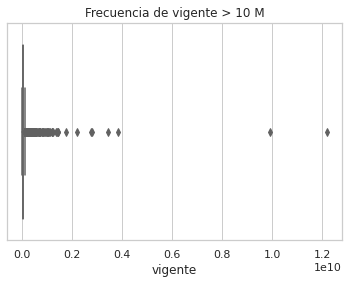

In [42]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_V["vigente"],palette="Reds")
ax.set_title('Frecuencia de vigente > 10 M')
fig = ax.get_figure()
fig.savefig('V.png')


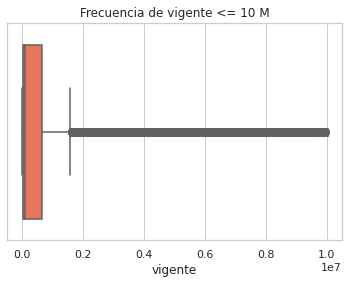

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_v["vigente"],palette="Reds")
ax.set_title('Frecuencia de vigente <= 10 M')
fig = ax.get_figure()
fig.savefig('v.png')

## Definitivo

In [44]:
df_D = df_presupuesto.loc[(df_presupuesto["definitivo"] > 10000000) & (df_presupuesto["definitivo"] != 0)]
df_d = df_presupuesto.loc[(df_presupuesto["definitivo"] <= 10000000) & (df_presupuesto["definitivo"] != 0)]
print(df_presupuesto[df_presupuesto.definitivo == 0].count()["definitivo"])

print(df_d["definitivo"].mean(),"\n", df_d["definitivo"].median(), "\n", df_d["definitivo"].std())
print("\n\n\n")
print(df_D["definitivo"].mean(),"\n", df_D["definitivo"].median(), "\n", df_D["definitivo"].std())

16007
804575.8209438261 
 98203.685 
 1660673.3695460786




63386999.91345608 
 23543106.75 
 316379007.24462354


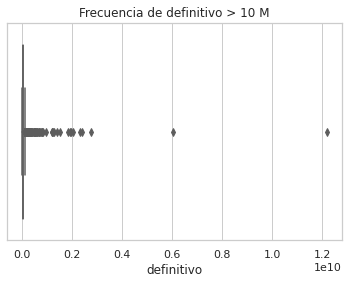

In [45]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_D["definitivo"], palette="Greens")
ax.set_title('Frecuencia de definitivo > 10 M')
fig = ax.get_figure()
fig.savefig('D.png')

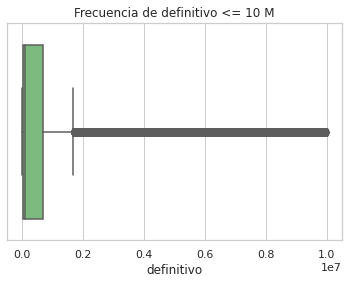

In [46]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_d["definitivo"], palette="Greens")
ax.set_title('Frecuencia de definitivo <= 10 M')
fig = ax.get_figure()
fig.savefig('d.png')

In [47]:
df_Dv = df_presupuesto.loc[(df_presupuesto["devengado"] > 10000000) & (df_presupuesto["devengado"] != 0)]
df_dv = df_presupuesto.loc[(df_presupuesto["devengado"] <= 10000000) & (df_presupuesto["devengado"] != 0)]
print(df_presupuesto[df_presupuesto.devengado == 0].count()["devengado"])



16874


In [48]:
print(df_dv["devengado"].mean(),"\n", df_dv["devengado"].median(), "\n", df_dv["devengado"].std())
print("\n\n\n")
print(df_Dv["devengado"].mean(),"\n", df_Dv["devengado"].median(), "\n", df_Dv["devengado"].std())

781999.0438554978 
 93800.69 
 1632113.6215224168




63303066.80790691 
 22804711.59 
 328869474.1026741


## Devengado

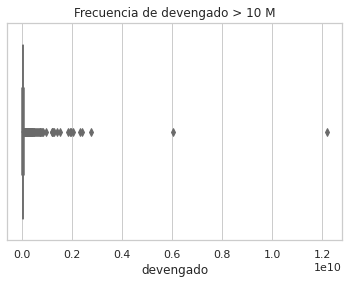

In [49]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_Dv["devengado"], palette="Purples")
ax.set_title('Frecuencia de devengado > 10 M')
fig = ax.get_figure()
fig.savefig('Dv.png')


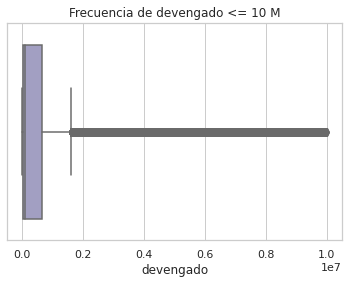

In [50]:

sns.set(style="whitegrid")
ax = sns.boxplot(x=df_dv["devengado"], palette="Purples")
ax.set_title('Frecuencia de devengado <= 10 M')
fig = ax.get_figure()
fig.savefig('dv.png')

## Análisis Bivariado 

### Numéricas
Comparamos las variables numéricas en los siguientes gráficos:

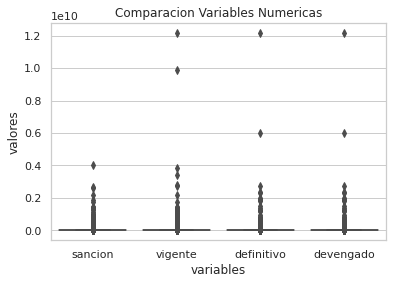

In [51]:
df = df_presupuesto[["sancion","vigente","definitivo","devengado"]]
ax = sns.boxplot(x="variables", y="valores", data=pd.melt(df, var_name='variables', value_name='valores'))
ax.set_title('Comparacion Variables Numericas')
fig = ax.get_figure()
plt.show()
fig.savefig('CVM.png')


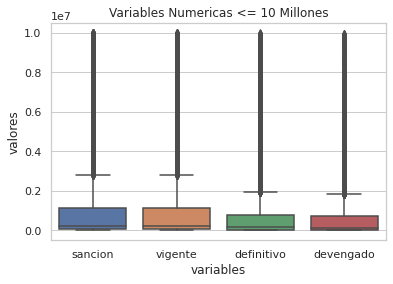

In [52]:
df = df.loc[(df["devengado"] <= 10000000) & (df["devengado"] != 0) &  (df["vigente"] <= 10000000) & (df["vigente"] != 0) &  (df["sancion"] <= 10000000) & (df["sancion"] != 0) &  (df["definitivo"] <= 10000000) & (df["definitivo"] != 0)]
ax = sns.boxplot(x="variables", y="valores", data=pd.melt(df, var_name='variables', value_name='valores'))
ax.set_title('Variables Numericas <= 10 Millones')
fig = ax.get_figure()
plt.show()
fig.savefig('CVMchicas.png')

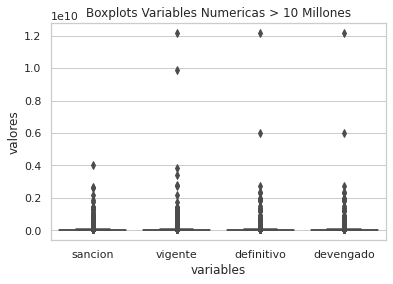

In [53]:
df = df_presupuesto[["sancion","vigente","definitivo","devengado"]]
df = df.loc[(df["devengado"] > 10000000)  |  (df["vigente"] > 10000000) | (df["sancion"] > 10000000) |  (df["definitivo"] > 10000000)]
ax = sns.boxplot(x="variables", y="valores", data=pd.melt(df, var_name='variables', value_name='valores'))
ax.set_title('Boxplots Variables Numericas > 10 Millones')
fig = ax.get_figure()
plt.show()
fig.savefig('CVMgrandes.png')


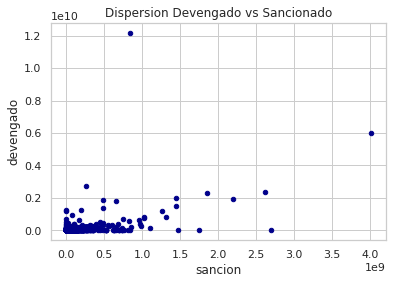

In [54]:
df = df_presupuesto[["sancion","vigente","definitivo","devengado"]]
ax = df.plot.scatter(x='sancion',
                      y='devengado',
                      c='DarkBlue')

ax.set_title('Dispersion Devengado vs Sancionado')
fig = ax.get_figure()
plt.show()
fig.savefig('sancion-vs-devengado.png')

In [55]:
df.corr()

,sancion,vigente,definitivo,devengado
sancion,1.000000,0.635581,0.513513,0.505972
vigente,0.635581,1.000000,0.933877,0.931916
definitivo,0.513513,0.933877,1.000000,0.998214
devengado,0.505972,0.931916,0.998214,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


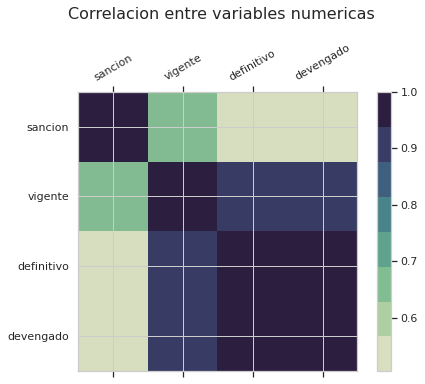

In [56]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
colors = sns.cubehelix_palette(8, start=.5, rot=-.75)

cmap = mpl.colors.ListedColormap(colors)

plt.figure(figsize=(7,5))
plt.matshow(df.corr(), cmap=cmap, fignum=1)
plt.xticks(range(len(df.columns)), df.columns , rotation = 30,)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.tight_layout()

fig = plt.gcf()
fig.suptitle("Correlacion entre variables numericas", fontsize=16, y=1.1)
plt.savefig('matrix.png')

### Categóricas

In [57]:
df = df_presupuesto[["fin_desc","car_desc"]]
df = df.melt(var_name='Type', value_name='M')
df

,Type,M
0,fin_desc,Administración Gubernamental
1,fin_desc,Administración Gubernamental
2,fin_desc,Administración Gubernamental
3,fin_desc,Administración Gubernamental
4,fin_desc,Administración Gubernamental
...,...,...
104101,car_desc,Organismos Descentralizados
104102,car_desc,Organismos Descentralizados
104103,car_desc,Organismos Descentralizados
104104,car_desc,Organismos Descentralizados


car_desc,Administracion Central,Organismos Descentralizados
fin_desc,,
Administración Gubernamental,9668,4494
Deuda Pública – Intereses Y Gastos,15,0
Servicios De Seguridad,3464,852
Servicios Económicos,6332,2122
Servicios Sociales,23808,1298


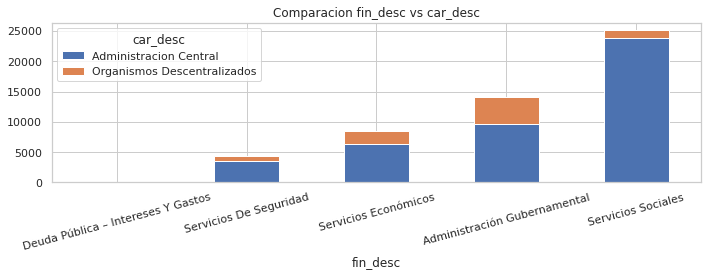

In [58]:
df = df_presupuesto[["fin_desc","car_desc"]]
df = pd.crosstab(df['fin_desc'], df['car_desc'])

df.sort_values("Administracion Central").plot(kind='bar', stacked=True, figsize = (10,4))
plt.xticks(rotation=15)
plt.title("Comparacion fin_desc vs car_desc")
plt.tight_layout()
plt.savefig("Comparacion categoricas")
              
df

### Categóricas vs Numéricas

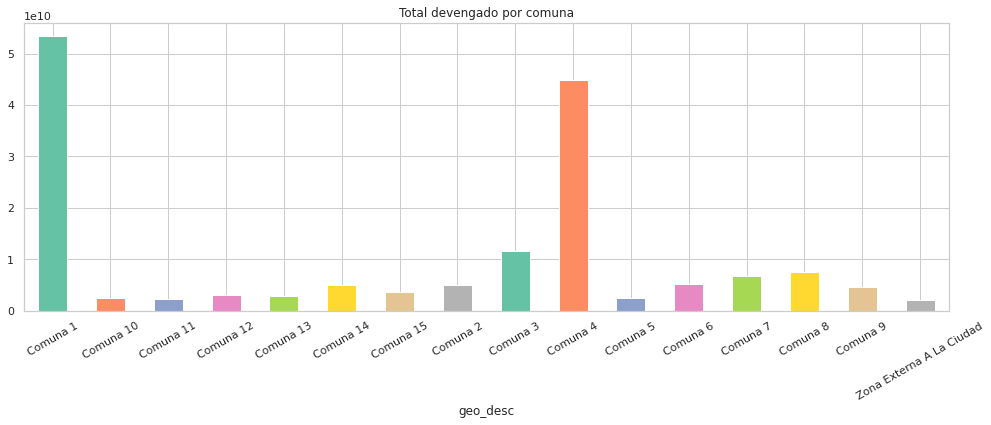

In [59]:
df = df_presupuesto[["geo_desc","devengado"]]
colors=sns.color_palette("Set2")
df.groupby('geo_desc', sort=True)['devengado'].sum().plot.bar(color = colors, figsize=(14,6))
plt.xticks(rotation=30)
plt.tight_layout()
plt.title("Total devengado por comuna")
plt.savefig("Comparacion comunas")  